In [1]:
# import libraries

from scipy.stats import sem as sem
import sys
import os
import glob
import BioSimSpace as BSS

if '/home/anna/Documents/cinnabar' not in sys.path:
    sys.path.insert(1, '/home/anna/Documents/cinnabar')
import cinnabar

print("adding code to the pythonpath...")
code = '/home/anna/Documents/code/python'
if code not in sys.path:
    sys.path.insert(1, code)
import pipeline

print(cinnabar.__file__)

from pipeline import *
from pipeline.utils import *
from pipeline.analysis import *

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.

adding code to the pythonpath...


/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


/home/anna/Documents/cinnabar/cinnabar/__init__.py


In [2]:
bench_folder = f"/home/anna/Documents/benchmark"
protein = "tyk2"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"

if os.path.exists(f"{main_dir}/outputs_extracted/results"):
    results_folder = f"{main_dir}/outputs_extracted/results"
elif os.path.exists(f"{main_dir}/outputs/results"):
    results_folder = f"{main_dir}/outputs/results"
# else:
#     raise ValueError(f"results directory not found in the {main_dir}. please make sure results were written using the analysis script previously in the pipeline")

output_folder = validate.folder_path(f"{main_dir}/analysis/comparing_methods", create=True)


In [7]:
engine = "AMBER"
all_analysis_object = analysis_network(results_folder,
                                       exp_file=exp_file,
                                       net_file=net_file,
                                       engines=engine,
                                       output_folder=output_folder,
                                       analysis_ext=ana_file,
                                       # name="softcore",
                                        )

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute(cycle_closure=False, use_cinnabar=True)

SVD did not converge
could not create cinnabar network for AMBER
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?


In [ ]:
write_modified_results_files(f"{results_folder}/final_summary_GROMACS_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv", name="switch", engine="GROMACS")
write_modified_results_files(f"{results_folder}/final_summary_GROMACS_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv", name="v_rescale", engine="GROMACS")

In [8]:
all_analysis_object.compute_other_results(glob.glob(f'{results_folder}/final_summary_{engine}_MBAR_alchemlyb_None_eqfalse_statstrue_truncate0end.csv'), name="stats", use_cinnabar=True)
all_analysis_object.compute_other_results(glob.glob(f'{results_folder}/final_summary_{engine}_MBAR_alchemlyb_None_eqtrue_statsfalse_truncate0end.csv'), name="eq", use_cinnabar=True)
all_analysis_object.compute_other_results(glob.glob(f'{results_folder}/final_summary_{engine}_MBAR_alchemlyb_None_eqtrue_statstrue_truncate0end.csv'), name="both", use_cinnabar=True)
# all_analysis_object.compute_other_results(f"{results_folder}/results_0_GROMACS_v_rescale.csv", name="v_rescale", use_cinnabar=True)


SVD did not converge
could not create cinnabar network for stats
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'stats'
could not convert val stats values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'stats'
could not convert val stats values for plotting. None will be used. Was cinnabar analysis carried out correctly?
SVD did not converge
could not create cinnabar network for eq
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'stats'
could not convert val stats values for pl

20 out of 24 have results, which is 83.33333333333334 %.
(20, 83.33333333333334, ['lig_ejm42~lig_ejm49', 'lig_ejm31~lig_ejm49', 'lig_ejm31~lig_ejm53', 'lig_ejm42~lig_ejm47', 'lig_ejm31~lig_ejm47', 'lig_ejm31~lig_jmc23', 'lig_ejm31~lig_ejm46', 'lig_ejm44~lig_ejm45', 'lig_jmc28~lig_jmc30', 'lig_ejm46~lig_jmc30', 'lig_ejm42~lig_ejm54', 'lig_ejm54~lig_ejm55', 'lig_ejm31~lig_ejm50', 'lig_ejm42~lig_ejm43', 'lig_ejm43~lig_ejm44', 'lig_ejm42~lig_ejm50', 'lig_ejm42~lig_ejm55', 'lig_ejm48~lig_ejm53', 'lig_jmc23~lig_jmc27', 'lig_jmc23~lig_jmc28'])
20 out of 24 have results, which is 83.33333333333334 %.


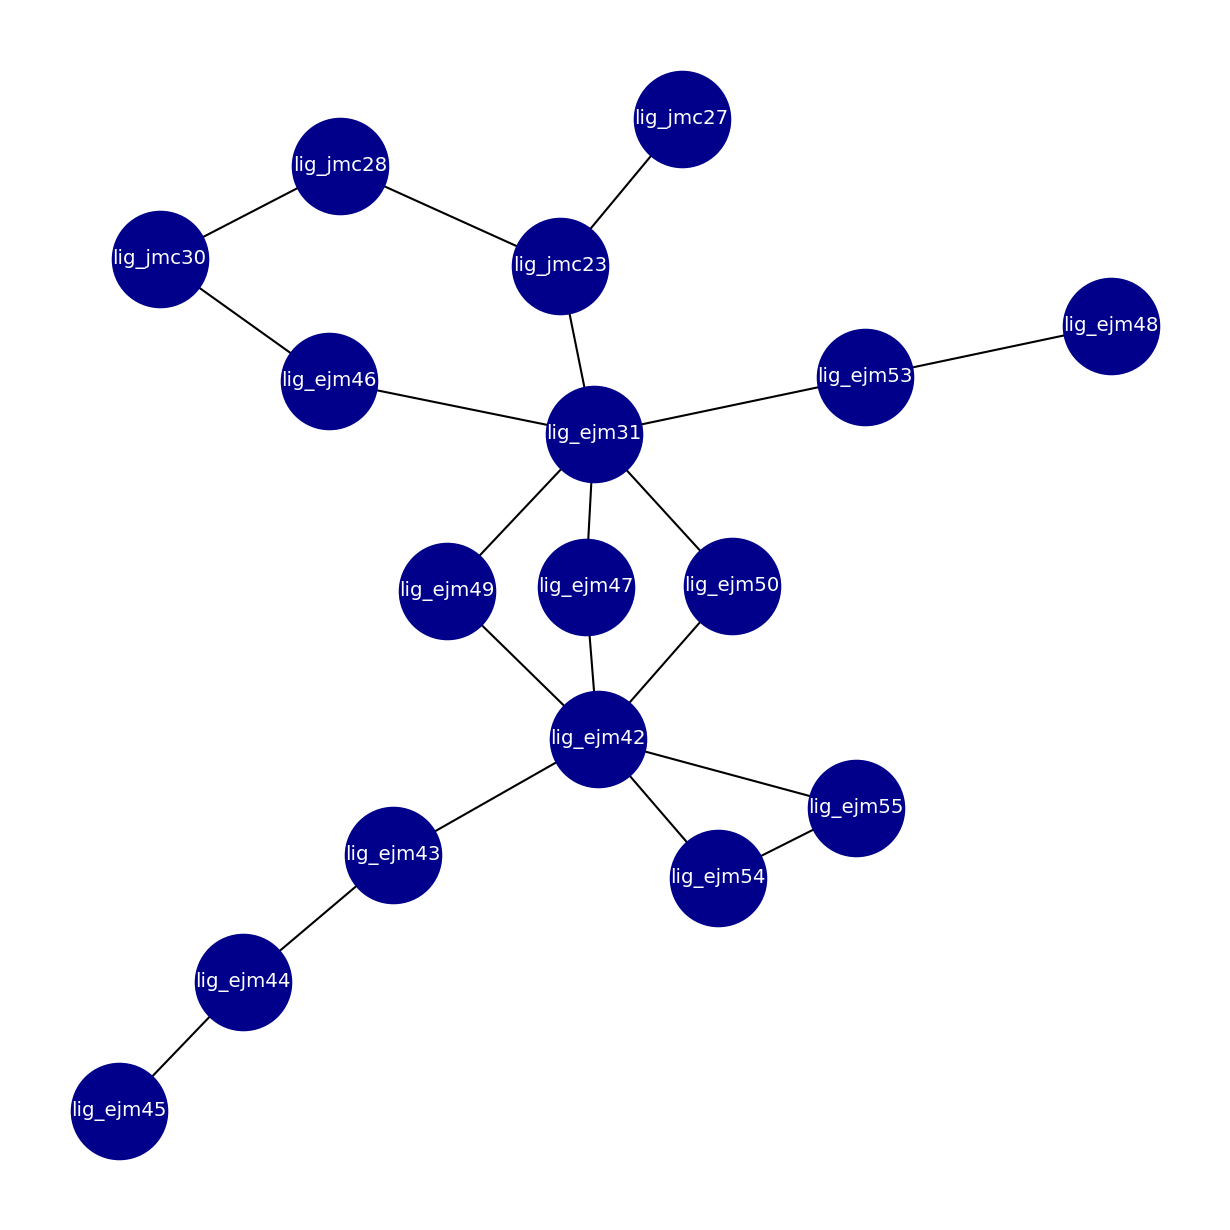

In [9]:
print(all_analysis_object.successful_runs(eng=engine))
# all_analysis_object.draw_graph()
all_analysis_object.remove_perturbations(all_analysis_object.failed_runs(eng=engine))  
all_analysis_object.remove_ligands(all_analysis_object.disconnected_ligands(eng=engine))
all_analysis_object.compute(cycle_closure=True, use_cinnabar=True)
all_analysis_object.draw_graph()

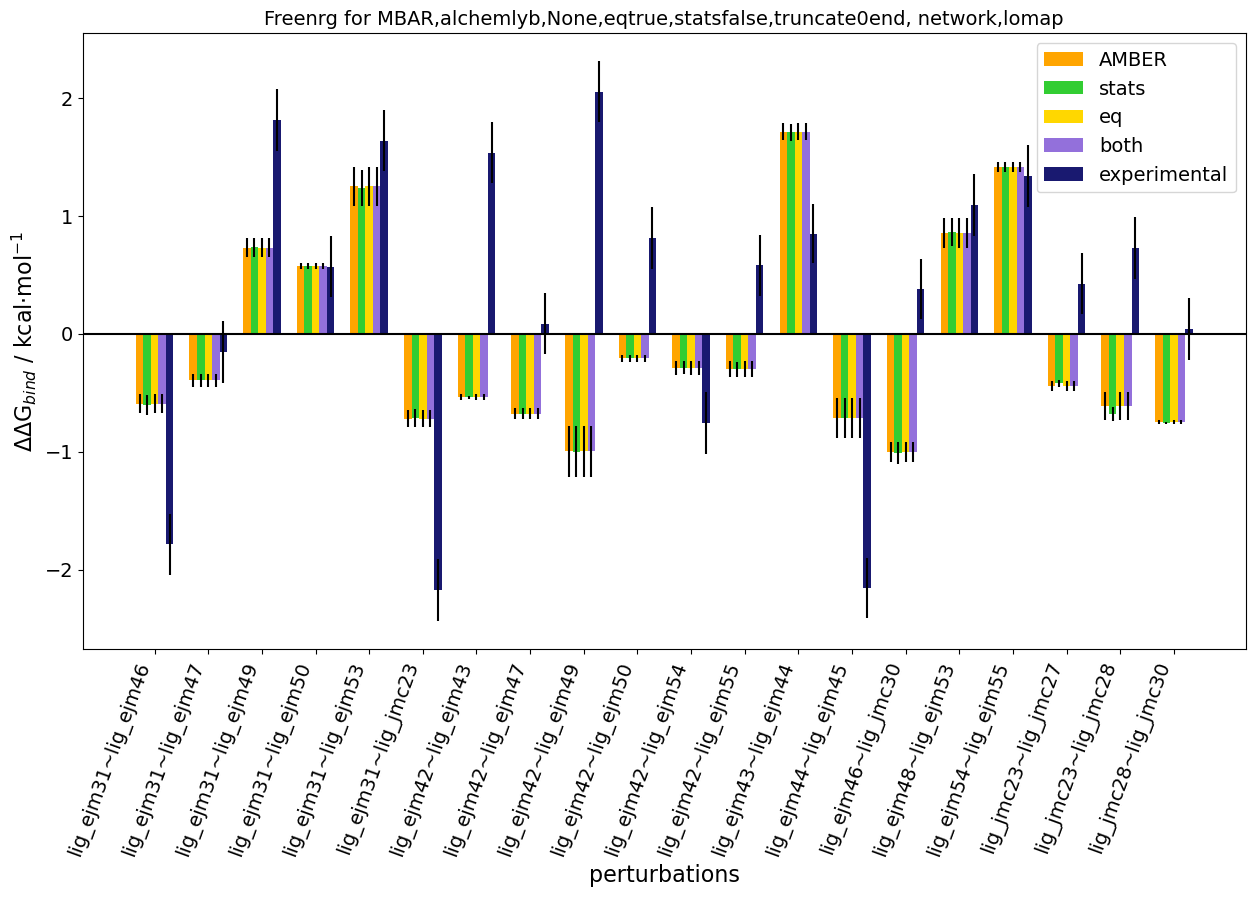

In [10]:
all_analysis_object._plotting_object.bar(pert_val="pert", names=[engine,"stats","eq","both","experimental"]) # , values=["lig_35~lig_49", "lig_60~lig_61", "lig_56~lig_59"]

In [ ]:
for meth in ["stats","eq","both",engine]:
    print(f"{meth} : {all_analysis_object._stats_object.compute_mue('val', y=meth)}")
